<a href="https://colab.research.google.com/github/shilpapanniru/ShilpaReddyDS/blob/main/censusincome_shilpa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/census-income .csv')


In [ ]:
data=pd.read_excel('/content/CreditWorthiness.xlsx')
data

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,Objective
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,Cautious plc is in the business of providing c...


In [ ]:
data.shape

(5, 4)

In [ ]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3'], dtype='object')

In [ ]:
 (-1 * np.sum(np.log2(probs) * probs))

NameError: name 'probs' is not defined

In [ ]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df.isna().sum().sum()

np.int64(0)

In [ ]:
df.duplicated().sum()

np.int64(24)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education-num   32537 non-null  int64 
 5   marital-status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital-gain    32537 non-null  int64 
 11  capital-loss    32537 non-null  int64 
 12  hours-per-week  32537 non-null  int64 
 13  native-country  32537 non-null  object
 14  annual_income   32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [ ]:
df.shape

(32537, 15)

In [ ]:
df['marital-status'].value_counts()

,count
marital-status,
Married-civ-spouse,14970
Never-married,10667
Divorced,4441
Separated,1025
Widowed,993
Married-spouse-absent,418
Married-AF-spouse,23


In [ ]:
df['annual_income'].value_counts()

,count
annual_income,
<=50K,24698
>50K,7839


In [ ]:
df['workclass'].value_counts()

,count
workclass,
Private,22673
Self-emp-not-inc,2540
Local-gov,2093
?,1836
State-gov,1298
Self-emp-inc,1116
Federal-gov,960
Without-pay,14
Never-worked,7


In [ ]:
#  How many people are having private work classes and are not from the United States of America?
private_work_class=df[(df['workclass']=='Private')&(df['native-country']!='United-States')]
len(private_work_class)

2145

In [ ]:
# How many people are either having Annual Income(last column) less than or equal to 50k or their working hours is greater than or equal to 40 hrs
people=df[(df['annual_income']=='<=50K')|(df['hours-per-week']>=40)]
len(people)

29482

In [ ]:
#Rename the last column as Annual Income
df.rename(columns={'annual_income':'Annual_income'},inplace=True)

In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Annual_income'],
      dtype='object')

In [ ]:
#Remove the missing values from the dataset
df.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [ ]:
df=df.replace('?',np.nan)

In [ ]:
df.isna().sum()

,0
age,0
workclass,1836
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,1843
relationship,0
race,0
sex,0


In [ ]:
df['occupation'].value_counts()

,count
occupation,
Prof-specialty,4136
Craft-repair,4094
Exec-managerial,4065
Adm-clerical,3768
Sales,3650
Other-service,3291
Machine-op-inspct,2000
Transport-moving,1597
Handlers-cleaners,1369


In [ ]:
df.isna().sum().sum()

np.int64(0)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum().sum()

np.int64(0)

In [ ]:
import numpy as np
# How many people are working as tech support and have an annual income greater than 50k

# Filter the DataFrame based on the conditions
tech_support_high_income = df[(df['occupation']=='Tech-support') & (df['annual_income']=='>50K')]

# Get the count of such people
count_tech_support_high_income = len(tech_support_high_income)

print(f"Number of people working as tech support with annual income >50K: {count_tech_support_high_income}")

Number of people working as tech support with annual income >50K: 278


In [ ]:
df['occupation'].isna().sum()

np.int64(1843)

In [ ]:
#Extract the “education” column and store it in “census_ed” .
census_ed=df['education']
census_ed


,education
0,Bachelors
1,Bachelors
2,HS-grad
3,11th
4,Bachelors
...,...
32556,Assoc-acdm
32557,HS-grad
32558,HS-grad
32559,HS-grad


In [ ]:
# Extract all the columns from “age” to “relationship” and store it in “census_seq”.
census_seq=df.loc[:,'age':'relationship']
census_seq

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife
...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child


In [ ]:
# Extract the column number “5”, “8”, “11” and store it in “census_col”.
census_col=df.iloc[:,[5,8,11]]
census_col


,marital-status,race,capital-loss
0,Never-married,White,0
1,Married-civ-spouse,White,0
2,Divorced,White,0
3,Married-civ-spouse,Black,0
4,Married-civ-spouse,Black,0
...,...,...,...
32556,Married-civ-spouse,White,0
32557,Married-civ-spouse,White,0
32558,Widowed,White,0
32559,Never-married,White,0


In [ ]:
#Extract all the male employees who work in state-gov and store it in “male_gov”.
male_gov=df[(df['sex']=='Male')&(df['workclass']=='State-gov')]

In [ ]:
male_gov

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
34,22,State-gov,311512,Some-college,10,Married-civ-spouse,Other-service,Husband,Black,Male,0,0,15,United-States,<=50K
48,41,State-gov,101603,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
123,29,State-gov,267989,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32163,36,State-gov,135874,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
32241,45,State-gov,231013,Bachelors,13,Divorced,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32321,54,State-gov,138852,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
32324,42,State-gov,138162,Some-college,10,Divorced,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K


In [ ]:
#Extract all the 39 year olds who either have a bachelor's degree or who are
#native of the United States and store the result in “census_us”.
census_us=df[('age'==39)&((df['education']=='Bachelors')|(df['native-country']=='United-States'))]
census_us



,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income


In [ ]:
#Extract 200 random rows from the “census” data frame and store it in “census_200”.
census_200 = df.sample(n=200, random_state=42)
census_200

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
3643,31,State-gov,33308,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
16042,24,Federal-gov,130534,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,40,United-States,<=50K
9404,60,Local-gov,98350,Some-college,10,Married-civ-spouse,Other-service,Husband,Asian-Pac-Islander,Male,0,0,60,Philippines,<=50K
17910,31,Private,398988,Some-college,10,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,40,United-States,<=50K
5200,43,Federal-gov,144778,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29351,69,Self-emp-not-inc,185039,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,9386,0,12,United-States,>50K
27404,61,Private,221447,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,Black,Female,0,0,40,United-States,<=50K
23761,47,Private,34458,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States,<=50K
20957,27,Private,192936,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [ ]:
#Get the count of different levels of the “workclass” column.
df['workclass'].value_counts()


,count
workclass,
Private,22673
Self-emp-not-inc,2540
Local-gov,2093
State-gov,1298
Self-emp-inc,1116
Federal-gov,960
Without-pay,14
Never-worked,7


In [ ]:
#Calculate the mean of the “capital.gain” column grouped according to “workclass
df.groupby('workclass')['capital-gain'].mean()

,capital-gain
workclass,
Federal-gov,833.232292
Local-gov,880.202580
Never-worked,0.000000
Private,890.119834
Self-emp-inc,4875.693548
Self-emp-not-inc,1886.804331
State-gov,701.699538
Without-pay,487.857143


In [ ]:
#Create a separate dataframe with the details of males and females from the census
#data that has income more than 50,000



In [ ]:
#Calculate the percentage of people from the United States who are private employees
#and earn less than or 50,000 annually.
df_us = df[((df['native-country'] == 38) & (df['annual_income'] == 0)) & (df['workclass']==2)]
percentage=(len(df_us)/len(df))*100
print(percentage)

0.0


In [ ]:
df['occupation'].value_counts()

,count
occupation,
Prof-specialty,4136
Craft-repair,4094
Exec-managerial,4065
Adm-clerical,3768
Sales,3650
Other-service,3291
Machine-op-inspct,2000
Transport-moving,1597
Handlers-cleaners,1369


In [ ]:
df['Annual_income'].value_counts()

,count
Annual_income,
<=50K,22633
>50K,7506


In [ ]:
df.shape

(30139, 15)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum().sum()

np.int64(0)

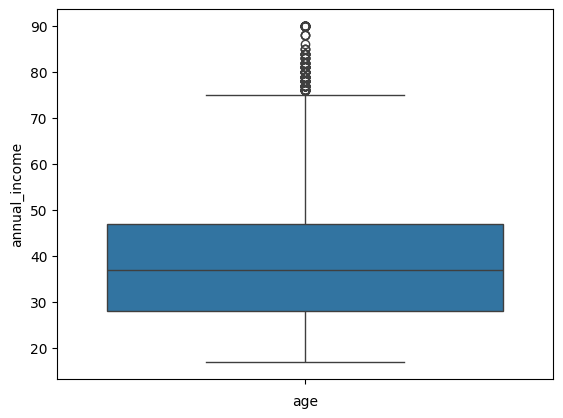

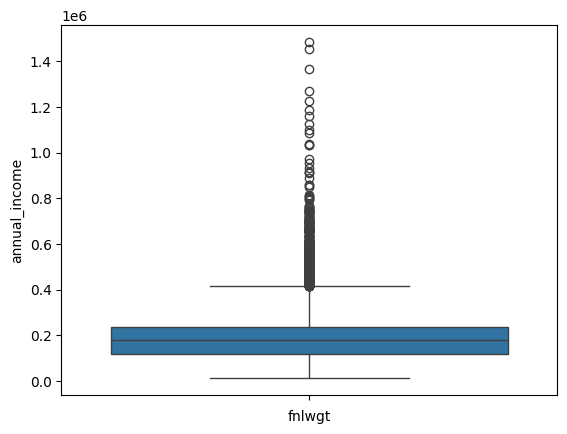

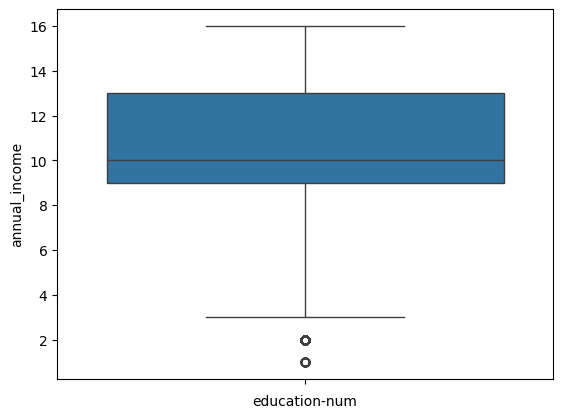

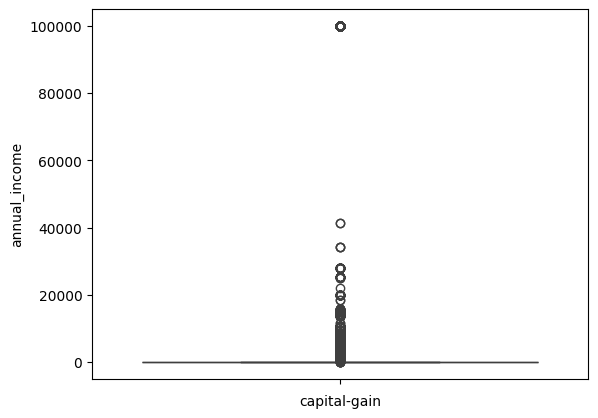

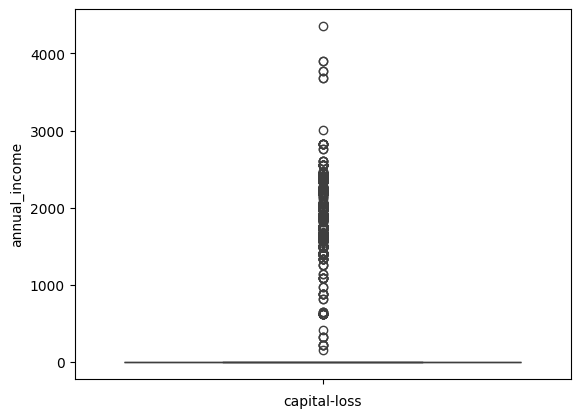

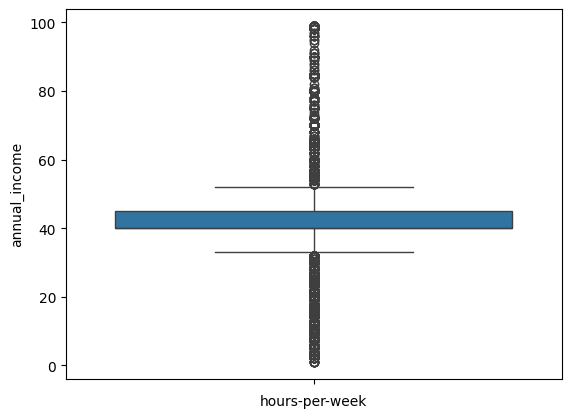

In [ ]:
#checking outliers
for i in df.columns:
  if df[i].dtype=='int64' or df[i].dtype=='float64':
    sns.boxplot(df[i])
    plt.xlabel(i)
    plt.ylabel('annual_income')
    plt.show()

In [ ]:
outlier_col=['age','fnlwgt','education-num','hours-per-week']

In [ ]:
#removing outliers of columns
for i in outlier_col:
  q1=df[i].quantile(0.25)
  q3=df[i].quantile(0.75)
  iqr=q3-q1
  lower_limit=q1-1.5*iqr
  upper_limit=q3+1.5*iqr


In [ ]:
df=df[(df[i]>lower_limit)&(df[i]<upper_limit)]

In [ ]:
df.shape

(22192, 15)

In [ ]:
#import labelencoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
#Label encoding
for i in df.columns:
  if df[i].dtype=='object':
    df[i]=le.fit_transform(df[i])

In [ ]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Annual_income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0
5,37,2,284582,12,14,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,2,310152,15,10,4,10,1,4,1,0,0,40,38,0
32556,27,2,257302,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,2,154374,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,2,151910,11,9,6,0,4,4,0,0,0,40,38,0


In [ ]:
df.info()

In [ ]:
#split the data into
x=df.drop('Annual_income',axis=1)
y=df['Annual_income']

In [ ]:
df['annual_income'].value_counts()

In [ ]:
#using Smote , make the dataset balanced
import imblearn
from imblearn.over_sampling import SMOTE

In [ ]:
se=SMOTE()

In [ ]:
#applying smote on df
df=pd.DataFrame(df)
x_resampled,y_resampled=se.fit_resample(x,y)

In [ ]:
y_resampled.value_counts()

In [ ]:
#split the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
#model building using logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()




In [ ]:
model=lr.fit(x_train,y_train)

In [ ]:
model

LogisticRegression()

In [ ]:
predict=model.predict(x_test)

In [ ]:
predict

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
#model evaluation
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
accuracy_score(y_test,predict)*100

77.39561429858817

In [ ]:
confusion_matrix(y_test,predict)

array([[4683,  186],
       [1319,  470]])

In [ ]:
3749+3453

In [ ]:
3749+

In [ ]:
report=classification_report(y_test,predict)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.96      0.86      4869
           1       0.72      0.26      0.38      1789

    accuracy                           0.77      6658
   macro avg       0.75      0.61      0.62      6658
weighted avg       0.76      0.77      0.73      6658



In [ ]:
# model building using decision tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()


In [ ]:
model1=dt.fit(x_train,y_train)
model1


In [ ]:
dt_predict=model1.predict(x_test)
dt_predict

In [ ]:
ACCscore=accuracy_score(y_test,dt_predict)
ACCscore

In [ ]:
print(classification_report(y_test,dt_predict))

In [ ]:
print(confusion_matrix(y_test,dt_predict))

In [ ]:
#model building using Random forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [ ]:
model2=rf.fit(x_train,y_train)
model2

In [ ]:
model2_predict=model2.predict(x_test)
model2_predict

In [ ]:
print(accuracy_score(y_test,model2_predict))

In [ ]:
print(classification_report(y_test,model2_predict))

In [ ]:
print(confusion_matrix(y_test,model2_predict))

In [ ]:
!pip install pycaret

In [ ]:
from pycaret.classification import *

RuntimeError: ('Pycaret only supports python 3.9, 3.10, 3.11. Your actual Python version: ', sys.version_info(major=3, minor=12, micro=12, releaselevel='final', serial=0), 'Please DOWNGRADE your Python version.')